In [1]:
from fastai.text import * 

# Train with best practices
more cycles, freeze/unfreeze, LR find, etc.

In [2]:
path = Path("\\\\?\\D:/Notebooks/email_urgent/data/v1/")

In [3]:
data_lm = TextLMDataBunch.from_folder(path)

In [4]:
# small batch size for sample. Change this when there is more data!
data_clas = TextClasDataBunch.from_folder(path, vocab=data_lm.train_ds.vocab, bs=16)

In [7]:
learn = language_model_learner(data_lm, drop_mult=0.5, pretrained_model=URLs.WT103_1)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


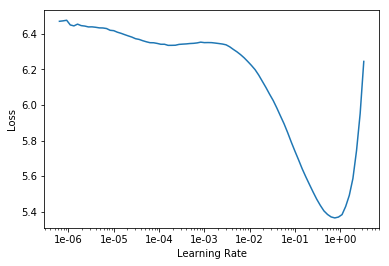

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy
1,3.764842,3.173771,0.412872


In [12]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy
1,3.118316,3.045883,0.435896


In [13]:
learn.fit_one_cycle(2, 1e-1)

epoch,train_loss,valid_loss,accuracy
1,2.993814,3.207762,0.417825
2,2.929325,2.979824,0.450818


In [14]:
learn.fit_one_cycle(3, 1e-1)

epoch,train_loss,valid_loss,accuracy
1,2.721168,3.173059,0.429790
2,3.006811,3.098130,0.440044
3,2.778321,2.970931,0.455092


In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


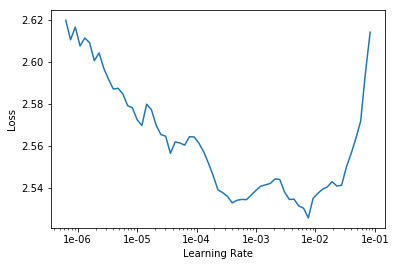

In [22]:
learn.recorder.plot(skip_end=20)

In [23]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,accuracy
1,2.517310,2.923689,0.459984


In [24]:
learn.fit_one_cycle(2, 1e-4)

epoch,train_loss,valid_loss,accuracy
1,2.484910,2.884631,0.463300
2,2.446443,2.872213,0.464648


In [25]:
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,accuracy
1,2.399382,2.852146,0.467573
2,2.351134,2.829424,0.470159
3,2.349782,2.826796,0.471112


In [26]:
learn.save_encoder('ft_enc')

In [27]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, pretrained_model=URLs.WT103_1, 
                                metrics=[Precision(), Recall(), accuracy])

In [28]:
learn.load_encoder('ft_enc')

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


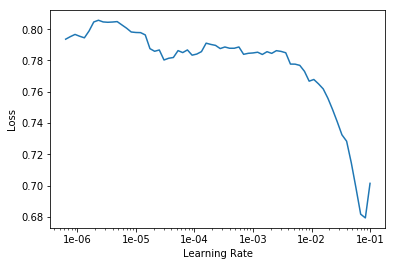

In [30]:
learn.recorder.plot(skip_end=20)

In [31]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,precision,recall,accuracy
1,0.663343,0.478314,nan,0.000000,0.962025


In [32]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,precision,recall,accuracy
1,0.439120,0.198593,nan,0.000000,0.962025
2,0.336920,0.182902,nan,0.000000,0.962025


# Weight classes for imbalance

In [36]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [45]:
loss_weights = torch.FloatTensor([1, 10]).cuda()
learn.loss_func = partial(F.cross_entropy, weight=loss_weights)

In [46]:
learn.loss_func

functools.partial(<function cross_entropy at 0x0000015A16AE2D90>, weight=tensor([ 1., 10.], device='cuda:0'))

In [47]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,precision,recall,accuracy
1,0.765601,0.681553,nan,0.000000,0.962025


In [48]:
learn.loss_func

functools.partial(<function cross_entropy at 0x0000015A16AE2D90>, weight=tensor([ 1., 10.], device='cuda:0'))

In [49]:
loss_weights = torch.FloatTensor([10, 1]).cuda()
learn.loss_func = partial(F.cross_entropy, weight=loss_weights)

In [50]:
learn.loss_func

functools.partial(<function cross_entropy at 0x0000015A16AE2D90>, weight=tensor([10.,  1.], device='cuda:0'))

In [51]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,precision,recall,accuracy
1,0.162603,0.083688,nan,0.000000,0.962025


In [54]:
learn.loss_func = lambda x: print("foo")

In [55]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,precision,recall,accuracy


TypeError: <lambda>() takes 1 positional argument but 2 were given

In [56]:
loss_weights = torch.FloatTensor([1, 100]).cuda()
learn.loss_func = partial(F.cross_entropy, weight=loss_weights)

In [57]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,precision,recall,accuracy
1,0.720914,0.632084,nan,0.000000,0.962025


In [59]:
loss_weights = torch.FloatTensor([100, 1]).cuda()
learn.loss_func = partial(F.cross_entropy, weight=loss_weights)

In [60]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,precision,recall,accuracy
1,0.226187,0.092846,nan,0.000000,0.962025


In [61]:
loss_weights = torch.FloatTensor([100]).cuda()
learn.loss_func = partial(F.cross_entropy, weight=loss_weights)

In [62]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,precision,recall,accuracy


RuntimeError: weight tensor should be defined either for all 2 classes or no classes but got weight tensor of shape: [1] at c:\a\w\1\s\tmp_conda_3.6_091443\conda\conda-bld\pytorch_1544087948354\work\aten\src\thcunn\generic/ClassNLLCriterion.cu:43